In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 6 ##

### Census ###

In [2]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [3]:
partial = full.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [4]:
partial.where('AGE', are.equal_to(0))

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
1,0,2018420,2017857
2,0,1932910,1930493


In [5]:
simple = partial.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014', '2014')
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [6]:
simple.sort('AGE', descending=True)

SEX,AGE,2010,2014
2,999,157257573,161920569
1,999,152089484,156936487
0,999,309347057,318857056
2,100,45058,58468
1,100,9351,13729
0,100,54409,72197
2,99,26074,32791
1,99,6104,9037
0,99,32178,41828
2,98,37533,46536


### Line Plots ###

In [8]:
no_999 = simple.where('AGE', are.below(999))

In [9]:
no_999

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [11]:
everyone = no_999.where('SEX', 0).drop('SEX')

In [12]:
everyone

AGE,2010,2014
0,3951330,3948350
1,3957888,3962123
2,4090862,3957772
3,4111920,4005190
4,4077552,4003448
5,4064653,4004858
6,4073013,4134352
7,4043047,4154000
8,4025604,4119524
9,4125415,4106832


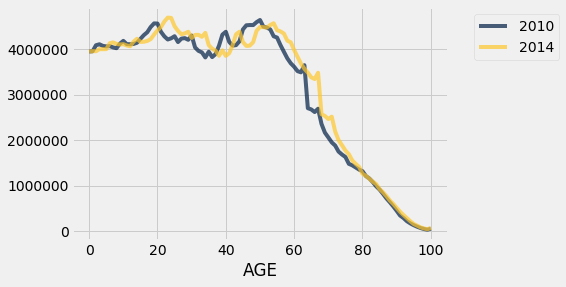

In [16]:
everyone.plot('AGE')

In [14]:
2010 - 63

1947

In [21]:
tbl = Table()
tbl = tbl.with_columns(
    'M pop', no_999.where('SEX', 1).column('2014'),
    'F pop', no_999.where('SEX', 2).column('2014'),
    'AGE', no_999.where('SEX', 2).column('AGE')
)

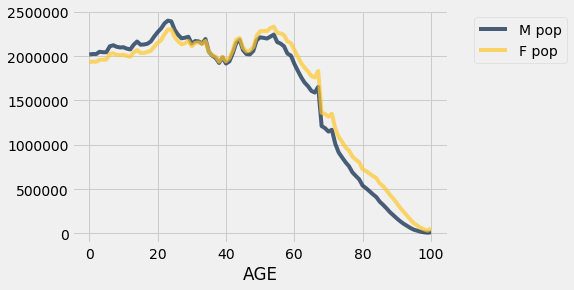

In [25]:
tbl.plot('AGE')

### Scatter Plots ###

In [26]:
actors = Table.read_table('actors.csv')

In [27]:
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


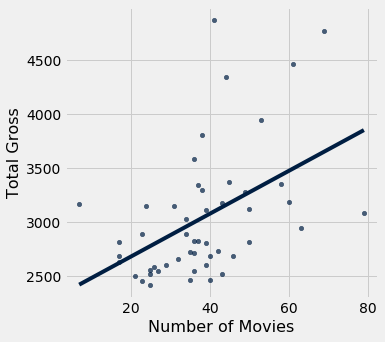

In [29]:
actors.scatter('Number of Movies',"Total Gross", fit_line=True)

In [34]:
actors.where('Number of Movies', are.equal_to(41))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7


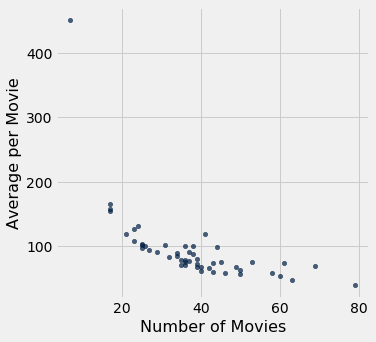

In [30]:
actors.scatter('Number of Movies', 'Average per Movie')

In [32]:
actors.sort('Numbber of Movies')

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7
Orlando Bloom,2815.8,17,165.6,Dead Man's Chest,423.3
Emma Watson,2681.9,17,157.8,Harry Potter / Deathly Hallows (P2),381
Daniel Radcliffe,2634.4,17,155,Harry Potter / Deathly Hallows (P2),381
Jeremy Renner,2500.3,21,119.1,The Avengers,623.4
Andy Serkis,2890.6,23,125.7,Star Wars: The Force Awakens,936.7
Chris Evans,2457.8,23,106.9,The Avengers,623.4
Will Smith,3149.1,24,131.2,Independence Day,306.2
Bradley Cooper,2557.7,25,102.3,American Sniper,350.1
Leonardo DiCaprio,2518.3,25,100.7,Titanic,658.7


### Bar Charts ###

In [ ]:
# only looking at one variable


### Distributions of Categorical Variables ###

In [ ]:
survey = Table().read_table('survey_fun.csv')
survey = survey.relabeled('In what year are you in your cumulative undergraduate studies?',
                         'Year in Undergrad')\
                .relabeled('In what year are you in your cumulative time at UC Berkeley?',
                            'Year at Cal')\
                .relabeled('Do you consider yourself an introvert or extrovert?',
                          'Extroversion Rating')\
                .relabeled('How many different people do you text (or any other forms of direct messaging) per day on average?',
                          'People Texted Per Day')\
                .relabeled('On average, how many hours of sleep do you get each night?',
                          'Hours of Sleep')\
                .relabeled('Are you left-handed or right-handed?', 'Handedness')\
                .relabeled('Which leg do you put in first when putting on pants?', 'Pants Leg Preference')
survey

In [ ]:
year_distribution = ...